In [12]:
import pandas as pd


df = pd.read_csv("xauusd.csv")
for i, d in enumerate(df["Date"]):
    df["Date"][i] = df["Date"][i].replace("/","-")
    if len(df["Date"][i].split("-")[1]) != 2 and len(df["Date"][i].split("-")[2]) != 2:
        df["Date"][i] = df["Date"][i].split("-")[0] + "-0" + df["Date"][i].split("-")[1] +"-0"+df["Date"][i].split("-")[2]
    elif len(df["Date"][i].split("-")[1]) != 2:
        df["Date"][i] = df["Date"][i].split("-")[0] + "-0" + df["Date"][i].split("-")[1] +"-"+df["Date"][i].split("-")[2]
    elif len(df["Date"][i].split("-")[2]) != 2:
        df["Date"][i] = df["Date"][i].split("-")[0] + "-" + df["Date"][i].split("-")[1] +"-0"+df["Date"][i].split("-")[2]

df

C:\Users\cre\AppData\Local\Temp\ipykernel_19568\3333424031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"][i] = df["Date"][i].replace("/","-")
C:\Users\cre\AppData\Local\Temp\ipykernel_19568\3333424031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"][i] = df["Date"][i].split("-")[0] + "-0" + df["Date"][i].split("-")[1] +"-0"+df["Date"][i].split("-")[2]
C:\Users\cre\AppData\Local\Temp\ipykernel_19568\3333424031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Date,Open,High,Low,Close
0,2010-03-01,1118.600,1122.720,1111.220,1116.300
1,2010-03-02,1116.630,1136.580,1114.030,1133.180
2,2010-03-03,1133.100,1144.080,1131.430,1139.300
3,2010-03-04,1138.680,1140.630,1125.330,1131.250
4,2010-03-05,1131.780,1139.630,1127.030,1133.900
...,...,...,...,...,...
3271,2022-10-31,1644.275,1645.675,1631.955,1632.755
3272,2022-11-01,1632.750,1656.850,1631.420,1648.300
3273,2022-11-02,1646.885,1669.205,1633.385,1634.175
3274,2022-11-03,1634.105,1641.035,1616.755,1630.325


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3276 non-null   datetime64[ns]
 1   Open    3276 non-null   float64       
 2   High    3276 non-null   float64       
 3   Low     3276 non-null   float64       
 4   Close   3276 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 128.1 KB


In [14]:
df['weekday'] = df['Date'].dt.weekday
df

,Date,Open,High,Low,Close,weekday
0,2010-03-01,1118.600,1122.720,1111.220,1116.300,0
1,2010-03-02,1116.630,1136.580,1114.030,1133.180,1
2,2010-03-03,1133.100,1144.080,1131.430,1139.300,2
3,2010-03-04,1138.680,1140.630,1125.330,1131.250,3
4,2010-03-05,1131.780,1139.630,1127.030,1133.900,4
...,...,...,...,...,...,...
3271,2022-10-31,1644.275,1645.675,1631.955,1632.755,0
3272,2022-11-01,1632.750,1656.850,1631.420,1648.300,1
3273,2022-11-02,1646.885,1669.205,1633.385,1634.175,2
3274,2022-11-03,1634.105,1641.035,1616.755,1630.325,3


In [16]:
# 初めの月曜日となる1965/1/4を基準に日数を追加
from datetime import datetime
from datetime import timedelta
start = datetime(2010,3,1)
df['weeks'] = (df['Date'] - start) // timedelta(weeks=1)
df

,Date,Open,High,Low,Close,weekday,weeks
0,2010-03-01,1118.600,1122.720,1111.220,1116.300,0,0
1,2010-03-02,1116.630,1136.580,1114.030,1133.180,1,0
2,2010-03-03,1133.100,1144.080,1131.430,1139.300,2,0
3,2010-03-04,1138.680,1140.630,1125.330,1131.250,3,0
4,2010-03-05,1131.780,1139.630,1127.030,1133.900,4,0
...,...,...,...,...,...,...,...
3271,2022-10-31,1644.275,1645.675,1631.955,1632.755,0,661
3272,2022-11-01,1632.750,1656.850,1631.420,1648.300,1,661
3273,2022-11-02,1646.885,1669.205,1633.385,1634.175,2,661
3274,2022-11-03,1634.105,1641.035,1616.755,1630.325,3,661


In [17]:
# カラムの並べ替え
df = df[['Date', 'weeks', 'weekday', 'High', 'Low', 'Open', 'Close']]
df

,Date,weeks,weekday,High,Low,Open,Close
0,2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300
1,2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180
2,2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300
3,2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250
4,2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900
...,...,...,...,...,...,...,...
3271,2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755
3272,2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300
3273,2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175
3274,2022-11-03,661,3,1641.035,1616.755,1634.105,1630.325


In [18]:
# データの並び替え
df.sort_values(by='Date', ascending=True, inplace=True)

# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250
2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900
...,...,...,...,...,...,...
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300
2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175


In [19]:
#カラム情報を1行上にずらしたデータフレームを作成する
df_shift = df.shift(-1)
df_shift

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
2010-03-01,0.0,1.0,1136.580,1114.030,1116.630,1133.180
2010-03-02,0.0,2.0,1144.080,1131.430,1133.100,1139.300
2010-03-03,0.0,3.0,1140.630,1125.330,1138.680,1131.250
2010-03-04,0.0,4.0,1139.630,1127.030,1131.780,1133.900
2010-03-05,1.0,0.0,1136.830,1117.780,1135.200,1123.630
...,...,...,...,...,...,...
2022-10-31,661.0,1.0,1656.850,1631.420,1632.750,1648.300
2022-11-01,661.0,2.0,1669.205,1633.385,1646.885,1634.175
2022-11-02,661.0,3.0,1641.035,1616.755,1634.105,1630.325


In [20]:
#翌日の始値と本日の終値の差分を追加する
df['delta_Close'] = df_shift['Close'] - df['Close']
df

,weeks,weekday,High,Low,Open,Close,delta_Close
Date,,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300,16.880
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180,6.120
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300,-8.050
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250,2.650
2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900,-10.270
...,...,...,...,...,...,...,...
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755,15.545
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300,-14.125
2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175,-3.850


In [21]:
#目的変数Upを追加する(翌日の終値が上がる場合1、それ以外は0とする)、'delta_Close'カラムの削除
df['Up'] = 0
df['Up'][df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis=1)
df

C:\Users\cre\AppData\Local\Temp\ipykernel_19568\422456459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up'][df['delta_Close'] > 0] = 1


,weeks,weekday,High,Low,Open,Close,Up
Date,,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300,1
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180,1
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300,0
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250,1
2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900,0
...,...,...,...,...,...,...,...
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755,1
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300,0
2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175,0


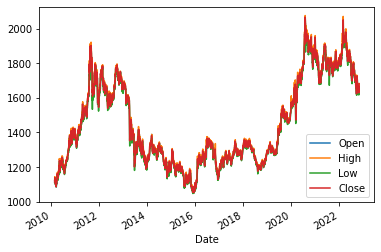

In [22]:
# 'Open', 'High', 'Low', 'Close'グラフ化のためにカラム抽出
df_new = df[['Open', 'High', 'Low', 'Close']]

# matplotlibのインポート
from matplotlib import pyplot as plt

# 時系列折れ線グラフの作成
df_new.plot(kind='line')
plt.show()

In [23]:
# 終値の前日比の追加
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300,1,NaN
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180,1,0.015121
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300,0,0.005401
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250,1,-0.007066
2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900,0,0.002343
...,...,...,...,...,...,...,...,...
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755,1,-0.007592
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300,0,0.009521
2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175,0,-0.008569


In [24]:
# 始値と終値の差分を追加
df['Body'] = df['Open'] - df['Close']
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300,1,NaN,2.300
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180,1,0.015121,-16.550
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300,0,0.005401,-6.200
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250,1,-0.007066,7.430
2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900,0,0.002343,-2.120
...,...,...,...,...,...,...,...,...,...
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755,1,-0.007592,11.520
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300,0,0.009521,-15.550
2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175,0,-0.008569,12.710


In [26]:
# 週番号をリストに格納
list_weeks = []
list_weeks = df['weeks'].unique()
list_weeks

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [27]:
# 各週ごとの日数を入力
df['week_days'] = 0

for i in list_weeks:
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])

df

C:\Users\cre\AppData\Local\Temp\ipykernel_19568\222086452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks'] == i] = len(df[df['weeks'] == i])


,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300,1,NaN,2.300,5
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180,1,0.015121,-16.550,5
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300,0,0.005401,-6.200,5
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250,1,-0.007066,7.430,5
2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900,0,0.002343,-2.120,5
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755,1,-0.007592,11.520,5
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300,0,0.009521,-15.550,5
2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175,0,-0.008569,12.710,5


In [28]:
# 月曜〜金曜まで5日分データのある週だけデータを取り出す
df = df[df['week_days'] == 5]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300,1,NaN,2.300,5
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180,1,0.015121,-16.550,5
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300,0,0.005401,-6.200,5
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250,1,-0.007066,7.430,5
2010-03-05,0,4,1139.630,1127.030,1131.780,1133.900,0,0.002343,-2.120,5
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755,1,-0.007592,11.520,5
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300,0,0.009521,-15.550,5
2022-11-02,661,2,1669.205,1633.385,1646.885,1634.175,0,-0.008569,12.710,5


In [29]:
#金曜日のデータを削除する(weekday:4となるデータ)
df = df[df['weekday'] != 4]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
2010-03-01,0,0,1122.720,1111.220,1118.600,1116.300,1,NaN,2.300,5
2010-03-02,0,1,1136.580,1114.030,1116.630,1133.180,1,0.015121,-16.550,5
2010-03-03,0,2,1144.080,1131.430,1133.100,1139.300,0,0.005401,-6.200,5
2010-03-04,0,3,1140.630,1125.330,1138.680,1131.250,1,-0.007066,7.430,5
2010-03-08,1,0,1136.830,1117.780,1135.200,1123.630,0,-0.009057,11.570,5
...,...,...,...,...,...,...,...,...,...,...
2022-10-27,660,3,1670.825,1655.065,1664.400,1663.455,0,-0.000829,0.945,5
2022-10-31,661,0,1645.675,1631.955,1644.275,1632.755,1,-0.007592,11.520,5
2022-11-01,661,1,1656.850,1631.420,1632.750,1648.300,0,0.009521,-15.550,5


In [30]:
# 不要カラムの削除と並べ替え
df = df[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body', 'Up']]
df

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2010-03-01,0,1122.720,1111.220,1118.600,1116.300,NaN,2.300,1
2010-03-02,1,1136.580,1114.030,1116.630,1133.180,0.015121,-16.550,1
2010-03-03,2,1144.080,1131.430,1133.100,1139.300,0.005401,-6.200,0
2010-03-04,3,1140.630,1125.330,1138.680,1131.250,-0.007066,7.430,1
2010-03-08,0,1136.830,1117.780,1135.200,1123.630,-0.009057,11.570,0
...,...,...,...,...,...,...,...,...
2022-10-27,3,1670.825,1655.065,1664.400,1663.455,-0.000829,0.945,0
2022-10-31,0,1645.675,1631.955,1644.275,1632.755,-0.007592,11.520,1
2022-11-01,1,1656.850,1631.420,1632.750,1648.300,0.009521,-15.550,0


In [31]:
# 学習データを2018-01-01〜2020-12-31の期間としdf_trainに入力する
df_train = df['2018-01-01' : '2020-12-31']
df_train

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2018-01-08,0,1322.19,1314.88,1320.97,1320.440,-0.000045,0.530,0
2018-01-09,1,1320.69,1308.95,1320.69,1312.790,-0.005794,7.900,1
2018-01-10,2,1327.54,1308.33,1312.32,1316.990,0.003199,-4.670,1
2018-01-11,3,1324.03,1315.78,1316.99,1322.410,0.004115,-5.420,1
2018-01-15,0,1344.70,1336.07,1336.55,1340.150,0.001495,-3.600,0
...,...,...,...,...,...,...,...,...
2020-12-10,3,1849.99,1828.89,1839.84,1836.790,-0.001777,3.050,1
2020-12-14,0,1841.46,1820.17,1841.46,1827.120,-0.006730,14.340,1
2020-12-15,1,1855.39,1825.66,1827.79,1853.360,0.014361,-25.570,1


In [32]:
# 検証データを2021-01-01以降としてとしてdf_valに入力する
df_val = df['2021-01-01' : ]
df_val

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2021-01-04,0,1944.440,1903.490,1903.490,1942.780,0.023213,-39.290,1
2021-01-05,1,1953.060,1934.450,1942.400,1950.180,0.003809,-7.780,0
2021-01-06,2,1959.110,1901.000,1950.560,1919.480,-0.015742,31.080,0
2021-01-07,3,1927.690,1906.970,1919.470,1913.250,-0.003246,6.220,0
2021-01-11,0,1856.580,1817.600,1849.220,1843.730,-0.002640,5.490,1
...,...,...,...,...,...,...,...,...
2022-10-27,3,1670.825,1655.065,1664.400,1663.455,-0.000829,0.945,0
2022-10-31,0,1645.675,1631.955,1644.275,1632.755,-0.007592,11.520,1
2022-11-01,1,1656.850,1631.420,1632.750,1648.300,0.009521,-15.550,0


In [33]:
# 学習データを説明変数(X_train)と目的変数(y_train)に分ける
X_train = df_train[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_train = df_train['Up']

# 学習データの説明変数と目的変数を確認
print(X_train)
print(y_train)

            weekday     High      Low     Open     Close  Close_ratio    Body
Date                                                                         
2018-01-08        0  1322.19  1314.88  1320.97  1320.440    -0.000045   0.530
2018-01-09        1  1320.69  1308.95  1320.69  1312.790    -0.005794   7.900
2018-01-10        2  1327.54  1308.33  1312.32  1316.990     0.003199  -4.670
2018-01-11        3  1324.03  1315.78  1316.99  1322.410     0.004115  -5.420
2018-01-15        0  1344.70  1336.07  1336.55  1340.150     0.001495  -3.600
...             ...      ...      ...      ...       ...          ...     ...
2020-12-10        3  1849.99  1828.89  1839.84  1836.790    -0.001777   3.050
2020-12-14        0  1841.46  1820.17  1841.46  1827.120    -0.006730  14.340
2020-12-15        1  1855.39  1825.66  1827.79  1853.360     0.014361 -25.570
2020-12-16        2  1865.68  1844.85  1853.49  1864.910     0.006232 -11.420
2020-12-17        3  1896.40  1862.34  1864.49  1885.595     0.0

In [34]:
# 検証データを説明変数(X_val)と目的変数(y_val)に分ける
X_val = df_val[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_val = df_val['Up']

# 検証データの説明変数と目的変数を確認
print(X_val)
print(y_val)

            weekday      High       Low      Open     Close  Close_ratio  \
Date                                                                       
2021-01-04        0  1944.440  1903.490  1903.490  1942.780     0.023213   
2021-01-05        1  1953.060  1934.450  1942.400  1950.180     0.003809   
2021-01-06        2  1959.110  1901.000  1950.560  1919.480    -0.015742   
2021-01-07        3  1927.690  1906.970  1919.470  1913.250    -0.003246   
2021-01-11        0  1856.580  1817.600  1849.220  1843.730    -0.002640   
...             ...       ...       ...       ...       ...          ...   
2022-10-27        3  1670.825  1655.065  1664.400  1663.455    -0.000829   
2022-10-31        0  1645.675  1631.955  1644.275  1632.755    -0.007592   
2022-11-01        1  1656.850  1631.420  1632.750  1648.300     0.009521   
2022-11-02        2  1669.205  1633.385  1646.885  1634.175    -0.008569   
2022-11-03        3  1641.035  1616.755  1634.105  1630.325    -0.002356   

           

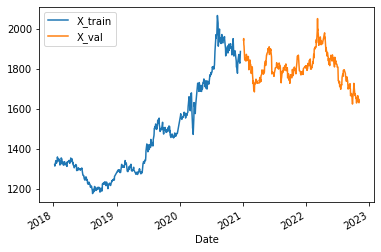

In [35]:
# 学習データと検証データの終値(Close)の折れ線グラフ作成
X_train['Close'].plot(kind='line')
X_val['Close'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_val'])

# グラフの表示
plt.show()

In [36]:
# 標準化関数(StandardScaler)のインポート
from sklearn.preprocessing import StandardScaler

# numpyのインポート
import numpy as np

# 4日ごとにデータを抜き出して、標準化ととnumpy配列に変換する関数(std_to_np)の定義
def std_to_np(df):
    df_list = []
    df = np.array(df)
    for i in range(0, len(df) - 3, 4):
        df_s = df[i:i+4]
        scl = StandardScaler()
        df_std = scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [37]:
# 学習データと検証データの説明変数に関数(std_to_np)を実行
X_train_np_array = std_to_np(X_train)
X_val_np_array = std_to_np(X_val)

# 学習データと検証データの形の確認
print(X_train_np_array.shape)
print(X_val_np_array.shape)

(147, 4, 7)
(93, 4, 7)


In [39]:
# 学習データと検証データの目的変数を確認
print(y_train)
print(y_val)

Date
2018-01-08    0
2018-01-09    1
2018-01-10    1
2018-01-11    1
2018-01-15    0
             ..
2020-12-10    1
2020-12-14    1
2020-12-15    1
2020-12-16    1
2020-12-17    0
Name: Up, Length: 588, dtype: int64
Date
2021-01-04    1
2021-01-05    0
2021-01-06    0
2021-01-07    0
2021-01-11    1
             ..
2022-10-27    0
2022-10-31    1
2022-11-01    0
2022-11-02    0
2022-11-03    1
Name: Up, Length: 372, dtype: int64


In [40]:
# 学習データ、検証データの目的変数の間引き
# 週の4日目(木曜日)のデータだけ抜き出す
y_train_new = y_train[3::4]
y_val_new = y_val[3::4]

# 間引き後の学習データと検証データの目的変数を確認
print(y_train_new)
print(y_val_new)

Date
2018-01-11    1
2018-01-18    1
2018-01-25    1
2018-02-01    0
2018-02-08    0
             ..
2020-11-19    1
2020-11-26    0
2020-12-03    0
2020-12-10    1
2020-12-17    0
Name: Up, Length: 147, dtype: int64
Date
2021-01-07    0
2021-01-14    0
2021-01-21    0
2021-01-28    1
2021-02-04    1
             ..
2022-10-06    0
2022-10-13    0
2022-10-20    1
2022-10-27    0
2022-11-03    1
Name: Up, Length: 93, dtype: int64


In [42]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\cre\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.0
    Uninstalling MarkupSafe-2.1.0:
      Successfully uninstalled MarkupSafe-2.1.0


You should consider upgrading via the 'c:\users\cre\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [43]:
# keras.modelsからSequentialのインポート
from keras.models import Sequential
# keras.layersからDense、LSTMのインポート
from keras.layers import Dense, LSTM
# Dropoutのインポート
from keras.layers import Dropout

In [44]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [45]:
# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit
# accuracy算出のためaccuracy_scoreのインポート
from sklearn.metrics import accuracy_score

In [46]:
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

In [47]:
for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train_np_array)):
    X_train, X_valid = X_train_np_array[train_indices], X_train_np_array[valid_indices]
    y_train, y_valid = y_train_new[train_indices], y_train_new[valid_indices]

    # LSTM構築とコンパイル関数にX_trainを渡し、変数modelに代入
    model = lstm_comp(X_train)

    # モデル学習
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # 予測
    y_valid_pred = model.predict(X_valid)

    # 予測結果の2値化
    y_valid_pred = np.where(y_valid_pred < 0.5, 0, 1)

    # 予測精度の算出と表示
    score = accuracy_score(y_valid, y_valid_pred)
    print(f'fold {fold} MAE: {score}')

    # 予測精度スコアをリストに格納
    valid_scores.append(score)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6869 - accuracy: 0.5484
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6838 - accuracy: 0.5806
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6734 - accuracy: 0.6129
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6721 - accuracy: 0.5484
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6631 - accuracy: 0.5806
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6607 - accuracy: 0.5484
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6525 - accuracy: 0.5806
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6431 - accuracy: 0.6452
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6391 - accuracy: 0.7097
Epoch 10/10
1/1 [==============================] - 0s 181ms/step
fold 0 MAE: 0.5862068965517241
Epoch 1/10
1/1 [=================

In [48]:
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')

valid_scores: [0.5862068965517241, 0.4827586206896552, 0.4827586206896552, 0.6551724137931034]
CV score: 0.5517241379310345


In [49]:
# LSTM構築とコンパイル関数にX_train_np_arrayを渡し、変数modelに代入
model = lstm_comp(X_train_np_array)

In [50]:
# モデルの学習の実行
result = model.fit(X_train_np_array, y_train_new, epochs=10, batch_size=64)

Epoch 1/10
3/3 [==============================] - 1s 36ms/step - loss: 0.6989 - accuracy: 0.4558
Epoch 2/10
3/3 [==============================] - 0s 32ms/step - loss: 0.6910 - accuracy: 0.5442
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6860 - accuracy: 0.5442
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 0.6821 - accuracy: 0.5578
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6803 - accuracy: 0.5578
Epoch 6/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6791 - accuracy: 0.5782
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6767 - accuracy: 0.6122
Epoch 8/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6739 - accuracy: 0.6259
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6713 - accuracy: 0.5850
Epoch 10/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6707 - accuracy: 0.5782


In [53]:
# 作成したモデルより検証データを用いて予測を行う
pred = model.predict(X_val_np_array)
pred[:10]

3/3 [==============================] - 0s 9ms/step


array([[0.64763004],
       [0.58836836],
       [0.46581608],
       [0.62424415],
       [0.6464454 ],
       [0.5633672 ],
       [0.649449  ],
       [0.6195983 ],
       [0.6679498 ],
       [0.4583189 ]], dtype=float32)

In [54]:
# 予測結果を0もしくは1に修正（0.5を境にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
pred = np.where(pred < 0.5, 0, 1)

# 修正した予測結果の先頭10件を確認
pred[:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [55]:
# 実際の結果から予測値の正解率を計算する
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(y_true=y_val_new, y_pred=pred))

accuracy =  0.5591397849462365


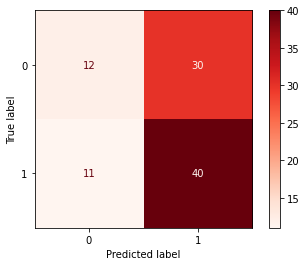

In [56]:
# 混同行列生成のためconfusion_matrixをインポート
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混同行列を表示
cm = confusion_matrix(y_val_new, pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)